**Text Classifier for Body Shaming Classification using BERT Transformer:**

In this Jupyter notebook, a text classifier for body shaming classification is implemented using the powerful BERT (Bidirectional Encoder Representations from Transformers) Transformer model. BERT, a state-of-the-art language model, is employed to capture contextual relationships and semantic meanings within the input text. Through a process of fine-tuning, the BERT model is trained on a labeled dataset comprising body shaming and non-body shaming examples.

The notebook provides detailed instructions on how to preprocess the text data, tokenize it, and convert it into BERT-compatible input formats. It demonstrates how to fine-tune the BERT model to our need and evaluate its performance using F1 score as the evaluation metric.

Upon training and evaluation, the text classifier achieves an impressive Accuracy of : **95%** 

This BERT-based text classifier offers a valuable tool for automatically identifying instances of body shaming, contributing to the efforts towards fostering a more respectful and inclusive online environment. It can be readily applied to new, unseen text data to classify it as either body shaming or not, aiding in the development of proactive interventions and promoting positive body image awareness.

## Set Up GPU


In [68]:
import tensorflow as tf 
gpus = tf.config.list_physical_devices('GPU')
gpu_id = 0
if gpus:
    # Restrict TensorFlow to only use only one GPU based on gpu_id
    try:
        tf.config.set_visible_devices(gpus[gpu_id], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)


2 Physical GPUs, 1 Logical GPU


## Importing Libraries

In [69]:
# pandas for data manipulation
import pandas as pd

# numpy for numerical computations
import numpy as np

# tqdm for progress monitoring
from tqdm.auto import tqdm

# tensorflow for deep learning
import tensorflow as tf

# BertTokenizer from transformers for tokenizing text
from transformers import BertTokenizer

# LabelEncoder from sklearn for encoding labels
from sklearn.preprocessing import LabelEncoder

# TFBertModel from transformers for using BERT model in TensorFlow
from transformers import TFBertModel

# Importing 'pyplot' module from Matplotlib for data visualization
import matplotlib.pyplot as plt  

# Importing NLTK library for natural language processing tasks
import nltk
  
# Importing NLTK's stopwords corpus
from nltk.corpus import stopwords  

# Importing 're' module for regular expressions
import re  

# Importing 'string' module for string manipulation functions
import string  

from sklearn.metrics import accuracy_score

from nltk.tokenize import word_tokenize

from nltk.probability import FreqDist

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
nltk.download('punkt')




## Importing Data

In [70]:
df = pd.read_csv(r'../data/bs.csv',sep=',')
df.describe()

,label
count,2159.000000
mean,0.340899
std,0.474121
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## EDA Analysis

**Step 1:Check Class Distribution**

In [71]:
class_counts = df['label'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
label
0    1423
1     736
Name: count, dtype: int64


**Step 2: Plot the Class Distribution**

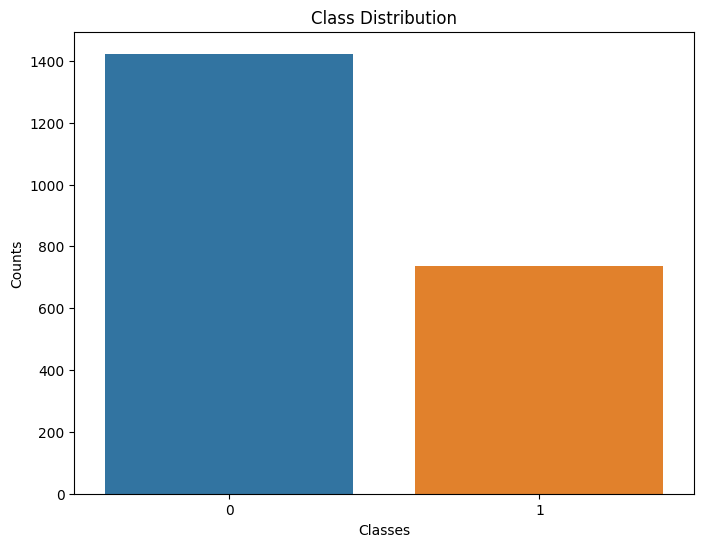

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

**Step 3: Tokenize the Text Data**

In [78]:
stop_words = set(stopwords.words('french'))

# Use a French tokenizer for word tokenization
tokenizer = RegexpTokenizer(r'\w+')

df['tokenized_text'] = df['text'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsouidi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dsouidi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Step 4: Calculate Word Frequencies for Each Class and Plot Top 20 Most Common Words**


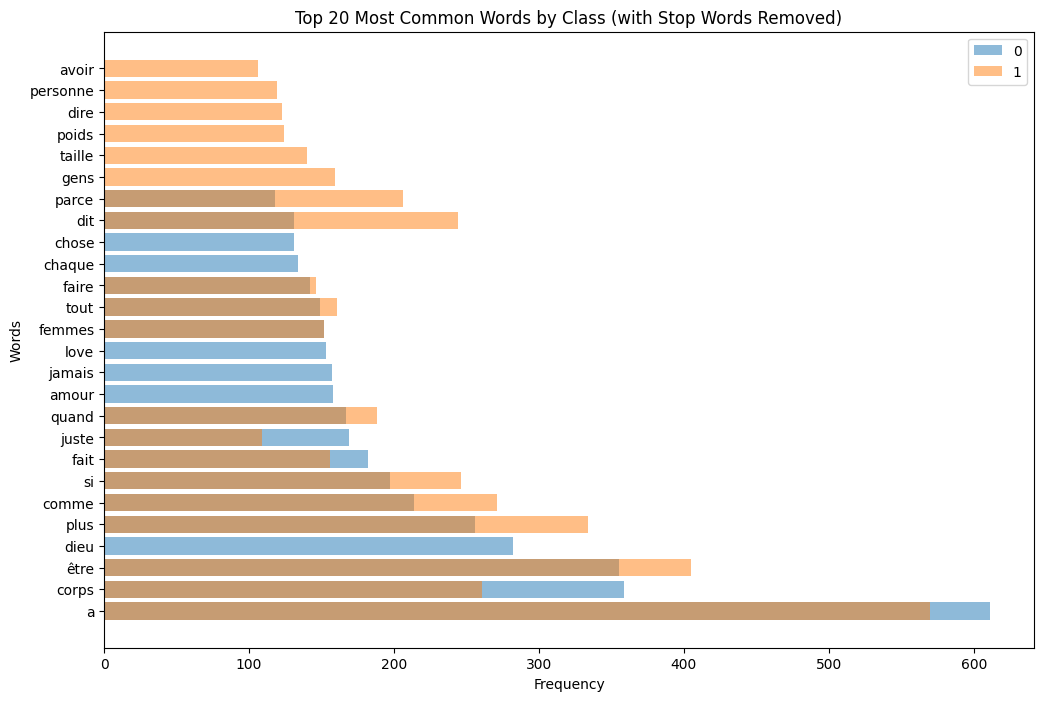

In [83]:
from nltk.probability import FreqDist
from collections import Counter

# Calculate the word frequencies for each class
class_word_freq = {}
for label in df['label'].unique():
    class_text = df[df['label'] == label]['tokenized_text'].sum()
    class_word_freq[label] = FreqDist(class_text)

# Plot the top 20 most common words for each class
plt.figure(figsize=(12, 8))
for label, freq_dist in class_word_freq.items():
    # Remove stopwords from frequency distribution
    freq_dist_no_stopwords = {word: freq for word, freq in freq_dist.items() if word not in stop_words}
    
    # Convert the frequency distribution to a Counter object
    freq_dist_counter = Counter(freq_dist_no_stopwords)
    
    # Get the top 20 most common words and their frequencies
    top_words = freq_dist_counter.most_common(20)
    
    # Extract the words and frequencies for plotting
    words = [word for word, freq in top_words]
    frequencies = [freq for word, freq in top_words]
    
    plt.barh(words, frequencies, alpha=0.5, label=label)

plt.title('Top 20 Most Common Words by Class (with Stop Words Removed)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.legend()
plt.show()


**Step 5: Generate Word Clouds for Each Class**

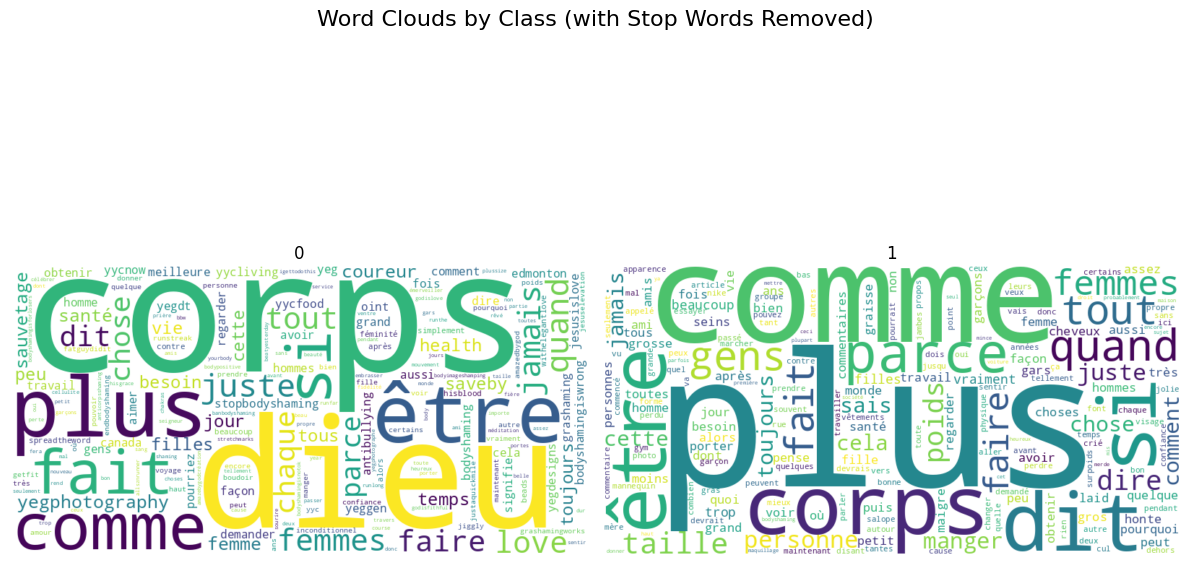

In [80]:
# Generate word clouds for each class
plt.figure(figsize=(12, 8))
for label, freq_dist in class_word_freq.items():
    # Remove stop words from frequency distribution
    freq_dist_no_stopwords = {word: freq for word, freq in freq_dist.items() if word not in stop_words}
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_no_stopwords)
    plt.subplot(1, 2, list(class_word_freq.keys()).index(label) + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(label)
plt.suptitle('Word Clouds by Class (with Stop Words Removed)', fontsize=16)
plt.tight_layout()
plt.show()

## Data Cleaning

In [76]:
df = df.dropna()

In [5]:
df.columns

Index(['text', 'label'], dtype='object')

In [6]:
df.label.value_counts()

label
0    1423
1     736
Name: count, dtype: int64

In [7]:
df.text = df.text.astype(str)
df.text = df.text.apply(str)

In [8]:
df.isnull().sum()
df = df.dropna() 

In [9]:
df_0 = df[df['label']== 0]
df_1 = df[df['label']== 1]

In [10]:
df_0_downsampled = df_0.sample(df_1.shape[0])


In [11]:
df = pd.concat([df_0_downsampled,df_1])

In [12]:
target_count = df["label"].value_counts()
target_count

label
0    736
1    736
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['label'])

#df['label'] = le.transform(df['label'])

LabelEncoder()

In [14]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


In [15]:
token = tokenizer.encode_plus(
    df['text'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)
     

In [16]:
token.input_ids


<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  4161,   108,   175,  5521,  6801,   173, 21418,  2145,
         3532,   175,  5521,  6801,   108,  1821,  6334, 11944,   191,
        21114,  1775,  5789, 10008,  5933, 22654,   108,  2153,   175,
         1200,  9745,  1197,  1962,  2980,   108,  1873,  2298,  1107,
        13328,  1161,  1177,  4935,   170,  7441,  4035, 26636,  6639,
         1361, 14516,  2316, 21883,  6137,  1891,   170, 11096, 24559,
         2083,   181,   112,  1107,  3121,  3080, 13759,  1831, 14637,
        20241,  1158,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [17]:
X_input_ids = np.zeros((len(df), 256))
X_attn_masks = np.zeros((len(df), 256))

In [18]:

def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [19]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)


1472it [00:02, 650.25it/s]


In [20]:
labels = np.zeros((len(df), 2))
labels.shape

(1472, 2)

In [21]:
labels[np.arange(len(df)), df['label'].values] = 1 # one-hot encoded target tensor


In [22]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:

# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [24]:

def DatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels
     

In [25]:
dataset = dataset.map(DatasetMapFunction) # converting to required format for tensorflow dataset 


In [26]:
dataset.take(1)


<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [27]:
dataset = dataset.shuffle(30000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [28]:
dataset.take(1)


<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

In [29]:
p = 0.8
train_size = int((len(df)//16)*p) # for each 32 batch of data we will have len(df)//32 samples, take 80% of that for train.
     

In [30]:
train_size


73

In [31]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [32]:
from transformers import TFBertModel


In [33]:
model = TFBertModel.from_pretrained('bert-base-cased') # bert base model with pretrained weights


Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [34]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(2, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

bert_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [35]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [36]:
bert_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [37]:
hist = bert_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=8,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',patience=3, restore_best_weights=True)]
)

Epoch 1/8


2023-06-23 15:35:32.256953: W tensorflow/compiler/xla/service/gpu/nvptx_helper.cc:56] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.2
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.


73/73 [==============================] - 80s 484ms/step - loss: 0.4658 - accuracy: 0.7920 - val_loss: 0.3228 - val_accuracy: 0.8783
Epoch 2/8
73/73 [==============================] - 26s 361ms/step - loss: 0.3416 - accuracy: 0.8664 - val_loss: 0.2940 - val_accuracy: 0.8882
Epoch 3/8
73/73 [==============================] - 20s 273ms/step - loss: 0.2775 - accuracy: 0.9041 - val_loss: 0.2752 - val_accuracy: 0.9013
Epoch 4/8
73/73 [==============================] - 21s 292ms/step - loss: 0.2205 - accuracy: 0.9212 - val_loss: 0.1590 - val_accuracy: 0.9539
Epoch 5/8
73/73 [==============================] - 18s 249ms/step - loss: 0.1972 - accuracy: 0.9272 - val_loss: 0.1348 - val_accuracy: 0.9507
Epoch 6/8
73/73 [==============================] - 19s 268ms/step - loss: 0.1614 - accuracy: 0.9478 - val_loss: 0.0722 - val_accuracy: 0.9803
Epoch 7/8
73/73 [==============================] - 17s 236ms/step - loss: 0.1284 - accuracy: 0.9563 - val_loss: 0.0669 - val_accuracy: 0.9803
Epoch 8/8
73/73 

In [38]:
bert_model.save('../deploiement/models/bert_model')

INFO:tensorflow:Assets written to: ../deploiement/models/bert_model/assets


INFO:tensorflow:Assets written to: ../deploiement/models/bert_model/assets


**Evaluation**

In [41]:
bert_model = tf.keras.models.load_model('../deploiement/models/bert_model')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

classes=['not_bodyshaming','bodyshaming']

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def predict(text):
    model = bert_model
    processed_data = prepare_data(text, tokenizer)
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [47]:
predict("fat")

1/1 [==============================] - 0s 66ms/step


'not_bodyshaming'

In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('../data/bs.csv')

df.loc[df["label"] == 0, "label"] = "not_bodyshaming"
df.loc[df["label"] == 1, "label"] = "bodyshaming" 



In [60]:
df['predicted_label'] = df['text'].apply(predict)
accuracy = accuracy_score(df['label'], df['predicted_label'])

1/1 [==============================] - 0s 74ms/step


Accuracy: 0.9495136637332098


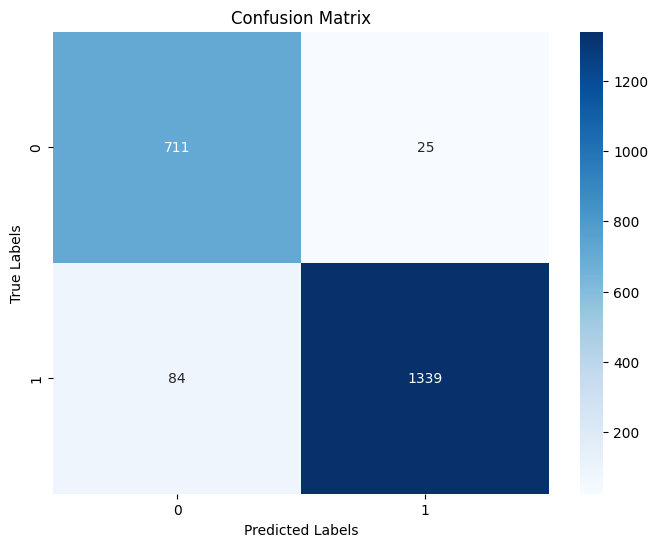

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(df['label'], df['predicted_label'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()